In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os

# Image processing libraries
import cv2 
import dlib
import imageio

# Local library
import Basic_Library as blib


1. Process for static image.

In [2]:
# Set image path.
img_path = os.path.join('data','Eyes_Open.jpg')

# Import image.
img = cv2.imread(img_path)

# Transform image to grayscale for computation.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Import face detector.
detector = dlib.get_frontal_face_detector()

# Import landmark predictor.
landmark_predictor_path = os.path.join('models', 'shape_predictor_68_face_landmarks.dat' )
predictor = dlib.shape_predictor(landmark_predictor_path)

In [3]:
# Get frontface bbox and landmarks and display on the image for the open eyes.
faces = detector(img_gray, 1)

nb_faces_front=len(list(enumerate(faces)))
print("Front facial detector found {0} faces".format(nb_faces_front))

Front facial detector found 1 faces


In [4]:
# Call function largest_front to get the principal face in the image.
principal_face = blib.largest_front(faces)

In [5]:
principal_face

rectangle(485,1125,1635,2275)

In [6]:
# Call the predictor and the function shape_to_np to get a list of facial landmark coordinates.
landmarks = predictor(img_gray, principal_face)
landmarks = blib.shape_to_np(landmarks)

In [7]:
# Call function eye_bboxes to obtain the bboxes for the left and the right eye.
left_eye_bbox, right_eye_bbox = blib.eye_bboxes(landmarks)

In [8]:
# Call function sleepy to determine if the eyes in the image are enough closed to indicate sleepy condition.
sleep = blib.sleepy(left_eye_bbox, right_eye_bbox, thresh = 0.15)
print('Is the driver sleepy? ', sleep)

Is the driver sleepy?  False


In [9]:
# Call function imprint_on_img to print the detected features on the input image.
img2 = blib.imprint_on_img(img, principal_face, landmarks, left_eye_bbox, right_eye_bbox)

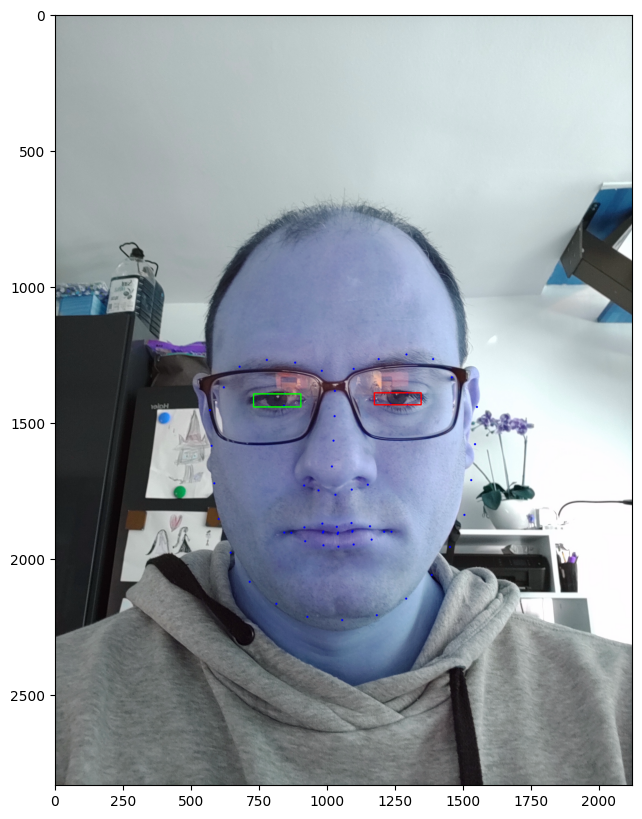

In [10]:
plt.figure(figsize=(12,10))
plt.imshow(img2)

2. Process for video; we will store and output it.

In [11]:
# Select path and import video.
video_path = os.path.join('data', 'Face_and_Eyes.mp4' )
output_vid_path = os.path.join('data', 'output_video.mp4')
cap = cv2.VideoCapture(video_path)

# Get the video properties.
fps = cap.get(cv2.CAP_PROP_FPS)
# target_fps = fps / 6
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Frame Rate: {fps} frames per second")
print(f'Video width: {width}, Video height: {height}')
print(f'Total number of frames in the original video: {total_frames}')



Frame Rate: 30.0 frames per second
Video width: 480, Video height: 640
Total number of frames in the original video: 1046


In [12]:
# Import face detector.
detector = dlib.get_frontal_face_detector()

# Import landmark predictor.
landmark_predictor_path = os.path.join('models', 'shape_predictor_68_face_landmarks.dat' )
predictor = dlib.shape_predictor(landmark_predictor_path)

# Loop through the video frames, make modifications and collate into new video.
modified_frames = []
count = 1

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Call function frame_processing to obtain the modified frame and whether in the frame
    # the eyes are detected to be closed.
    modified_frame, eyes_closed = blib.frame_processing(frame, detector, predictor)

    # Append the modified frame to the list
    modified_frames.append(modified_frame)

    # Track algorithm progress.
    print('Frame processed: ', count)
    count += 1

cap.release()


Frame processed:  1
Frame processed:  2
Frame processed:  3
Frame processed:  4
Frame processed:  5
Frame processed:  6
Frame processed:  7
Frame processed:  8
Frame processed:  9
Frame processed:  10
Frame processed:  11
Frame processed:  12
Frame processed:  13
Frame processed:  14
Frame processed:  15
Frame processed:  16
Frame processed:  17
Frame processed:  18
Frame processed:  19
Frame processed:  20
Frame processed:  21
Frame processed:  22
Frame processed:  23
Frame processed:  24
Frame processed:  25
Frame processed:  26
Frame processed:  27
Frame processed:  28
Frame processed:  29
Frame processed:  30
Frame processed:  31
Frame processed:  32
Frame processed:  33
Frame processed:  34
Frame processed:  35
Frame processed:  36
Frame processed:  37
Frame processed:  38
Frame processed:  39
Frame processed:  40
Frame processed:  41
Frame processed:  42
Frame processed:  43
Frame processed:  44
Frame processed:  45
Frame processed:  46
Frame processed:  47
Frame processed:  48
F

In [13]:
# Call function create_video
blib.video_creator_264(modified_frames, output_vid_path, fps)

AttributeError: module 'Basic_Library' has no attribute 'video_creator'